# AI for Biotechnology
<span style="color:#AAA;font-size:14px;" >Prof. Dr. Dominik Grimm</span>  
<span style="color:#AAA;font-size:14px;">Bioinformatics Research Lab</span>  
<span style="color:#AAA;font-size:14px;">TUM Campus Straubing for Biotechnology and Sustainability</span>  

## Logistic Regression Exercise #5
In this exercise we would like to compare the performance of different logistic regression models with different regualrization techniques. For this purpose, we first load the data from the hands-on tutorial, where we tried to predict if a certain plant flowers early or late using its genetics differences as features. We then remove 20% of the dataset into a seperate testing dataset:

In [1]:
%matplotlib inline
import pylab as pl
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

#Load plant genotype and phenotype
X = np.loadtxt("plant_genotype.csv", delimiter=",")
y = np.loadtxt("plant_flowering_time_binary.csv")

#create train-test split, the test data will only be used for final evaluation
#Please note that we replace the old X and y with the "training" split
X, X_test, y, y_test = train_test_split(X, y, test_size = 0.2, random_state=20)

The testing data will remain untouch in the model selection phase and will only be used in the end, after we have selected the best performing model to test its generalization abilities.  

Such that we can compare the performance of different models we will split the remaining data into a training- and validation dataset:

In [2]:
#split data into validation and training
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=20)

A simple logistic regression model without regularization serves as baseline comparison partner. We estimate coefficients of the logistic regression model on the training data and evaluate the performance on the left out validation data:

In [3]:
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

#Train Simple Linear regression without regularization
model = LogisticRegression(penalty="none",solver="lbfgs")

#train logistic regression
model.fit(X_train,y_train)

#test logistic regression on validation data
y_pred = model.predict(X_val)

#compute metrics
acc = metrics.accuracy_score(y_val, y_pred)
auc = metrics.roc_auc_score(y_val,y_pred)
precision = metrics.precision_score(y_val,y_pred)
recall = metrics.recall_score(y_val,y_pred)
mcc = metrics.matthews_corrcoef(y_val,y_pred)

print("Accuracy (Val):\t\t%.2f" % acc)
print("ROC-AUC (Val):\t\t%.2f" % auc)
print("Precision (Val):\t%.2f" % precision)
print("Recall (Val):\t\t%.2f" % recall)
print("MCC (Val):\t\t%.2f" % mcc)


Accuracy (Val):		0.61
ROC-AUC (Val):		0.60
Precision (Val):	0.58
Recall (Val):		0.54
MCC (Val):		0.21


Next we plot the estimated coefficients of the model:

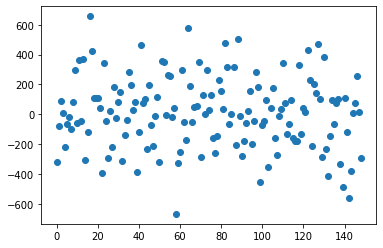

In [4]:
#Plot beta estimates
pl.scatter(np.arange(X.shape[1]),model.coef_)

Next we train the logistic regression model using a l2-penalty with an internal cross-validation to find the optimal hyperparameter $C$. Again we plot the estiamted coefficients of the l2-lr model:

Accuracy (Val):		0.70
ROC-AUC (Val):		0.68
Precision (Val):	0.75
Recall (Val):		0.52
MCC (Val):		0.39
Best C:			0.046416


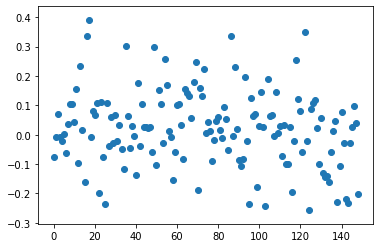

In [5]:
from sklearn.linear_model import LogisticRegressionCV

#Train Simple Linear regression without regularization
model2 = LogisticRegressionCV(Cs=10, penalty="l2",solver="lbfgs",cv=5,max_iter=2000)

#train logistic regression
model2.fit(X_train,y_train)

#test logistic regression on validation data
y_pred = model2.predict(X_val)

acc2 = metrics.accuracy_score(y_val, y_pred)
auc2 = metrics.roc_auc_score(y_val,y_pred)
precision2 = metrics.precision_score(y_val,y_pred)
recall2 = metrics.recall_score(y_val,y_pred)
mcc2 = metrics.matthews_corrcoef(y_val,y_pred)


print("Accuracy (Val):\t\t%.2f" % acc2)
print("ROC-AUC (Val):\t\t%.2f" % auc2)
print("Precision (Val):\t%.2f" % precision2)
print("Recall (Val):\t\t%.2f" % recall2)
print("MCC (Val):\t\t%.2f" % mcc2)
print("Best C:\t\t\t%f" %model2.C_)

#Plot beta estimates
pl.scatter(np.arange(X.shape[1]),model2.coef_)

## Exercise 5.1
Train a logistic regression model with a $l1$-penalty on the training data. Use cross-validation to find the optimal hyperparameter $C$ and evaluate the performance of your model on the validation data:

In [6]:
#Your Code comes here:
#Train Simple Linear regression without regularization
model3 = LogisticRegressionCV(Cs=10, penalty="l1",solver="liblinear",cv=5,max_iter=2000)

#train logistic regression
model3.fit(X_train,y_train)

#test logistic regression on validation data
y_pred = model3.predict(X_val)

acc3 = metrics.accuracy_score(y_val, y_pred)
auc3 = metrics.roc_auc_score(y_val,y_pred)
precision3 = metrics.precision_score(y_val,y_pred)
recall3 = metrics.recall_score(y_val,y_pred)
mcc3 = metrics.matthews_corrcoef(y_val,y_pred)

print("Accuracy (Val):\t\t%.2f" % acc3)
print("ROC-AUC (Val):\t\t%.2f" % auc3)
print("Precision (Val):\t%.2f" % precision3)
print("Recall (Val):\t\t%.2f" % recall3)
print("MCC (Val):\t\t%.2f" % mcc3)
print("Best C:\t\t\t%f" %model3.C_)

Accuracy (Val):		0.71
ROC-AUC (Val):		0.70
Precision (Val):	0.78
Recall (Val):		0.54
MCC (Val):		0.43
Best C:			0.359381


Plot the estimated coefficients of the $l1$-regularized logistic regression model and interprete the plot. What do you observe?

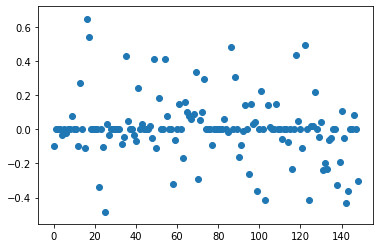

In [7]:
#Your code comes here
#Plot beta estimates
pl.scatter(np.arange(X.shape[1]),model3.coef_)

## Exercise 5.2
Train a logistic regression model with both, a $l1$- and a $l2$-penalty on the training data. Use a 5-fold cross-validation to find the optimal hyperparameter $C$ and $l1$ ratio and evaluate the performance of your model on the validation data:

In [8]:
#Range of hyperparameters
Cs = 5 #use 5 C values between 
l1_ratios=[0,0.25,0.5,0.75,1.0] #tradeoff between l1 and l2 penalty

#Your code comes here to train a logistic regression model with l1- and l2-penalty
#Train Simple Linear regression without regularization
model4 = LogisticRegressionCV(Cs=5, penalty="elasticnet",solver="saga",cv=5,
                              l1_ratios=[0,0.25,0.5,0.75,1.0],max_iter=4000)

#train logistic regression
model4.fit(X_train,y_train)

#test logistic regression on validation data
y_pred = model4.predict(X_val)

acc4 = metrics.accuracy_score(y_val, y_pred)
auc4 = metrics.roc_auc_score(y_val,y_pred)
precision4 = metrics.precision_score(y_val,y_pred)
recall4 = metrics.recall_score(y_val,y_pred)
mcc4 = metrics.matthews_corrcoef(y_val,y_pred)

print("Accuracy (Val):\t\t%.2f" % acc4)
print("ROC-AUC (Val):\t\t%.2f" % auc4)
print("Precision (Val):\t%.2f" % precision4)
print("Recall (Val):\t\t%.2f" % recall4)
print("MCC (Val):\t\t%.2f" % mcc4)

print("Best C:\t\t\t%f" %model4.C_)
print("Best L1_Ratio:\t\t%f" %model4.l1_ratio_)

Accuracy (Val):		0.75
ROC-AUC (Val):		0.73
Precision (Val):	0.93
Recall (Val):		0.50
MCC (Val):		0.54
Best C:			0.010000
Best L1_Ratio:		0.000000


## Exercise 5.3
Summerize the results of all 4 models in one ROC plot. Add labels and legends to the plot such that you can compare the different models. Which model performs best?

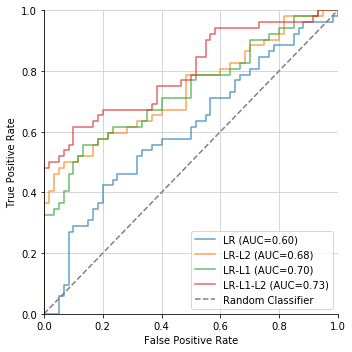

In [9]:
#generate roc plot
fig = pl.figure(figsize=(5,5))
ax = fig.add_subplot(111)

#for roc curve for lr without regularization
scores = model.decision_function(X_val)
fpr, tpr, thresholds = metrics.roc_curve(y_val, scores)
ax.plot(fpr,tpr,alpha=0.7,label="LR (AUC=%.2f)" % (auc))

#for roc curve for lr with l2 regularization
scores = model2.decision_function(X_val)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_val, scores)
ax.plot(fpr2,tpr2,alpha=0.7,label="LR-L2 (AUC=%.2f)" % (auc2))

#for roc curve for lr with l1 regularization
scores = model3.decision_function(X_val)
fpr3, tpr3, thresholds3 = metrics.roc_curve(y_val, scores)
ax.plot(fpr3,tpr3,alpha=0.7,label="LR-L1 (AUC=%.2f)" % (auc3))

#for roc curve for lr with elasticnet regularization
scores = model4.decision_function(X_val)
fpr4, tpr4, thresholds4 = metrics.roc_curve(y_val, scores)
ax.plot(fpr4,tpr4,alpha=0.7,label="LR-L1-L2 (AUC=%.2f)" % (auc4))

ax.plot([0,1], [0,1], color="grey",label="Random Classifier",linestyle="--")
#Set axis labels
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
#Set axis limits
ax.set_ylim(0,1)
ax.set_xlim(0,1)
#show grid in grey and set top and right axis to invisible
ax.grid(color="#CCCCCC")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
pl.legend()
pl.tight_layout()

## Exercise 5.4
Select the best performing model from above and retrain it on the full training data with the optimal hyperparemters form the best model. Use then the untouched test data to evaluate the performance of the best model on unknown data. Does your model generalize? Is it good in predicting if a plant is early or late flowering? Visualize your results for the validation data and the testing data in a single roc plot!

Accuracy (Val):		0.75
Accuracy (Test):	0.75

ROC-AUC (Val):		0.73
ROC-AUC (Test):		0.68

Precision (Val):	0.93
Precision (Test):	0.81

Recall (Val):		0.50
Recall (Test):		0.41

MCC (Val):		0.54
MCC (Test):		0.44


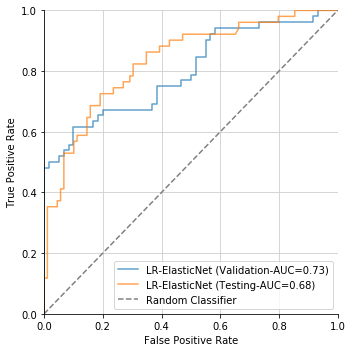

In [10]:
#your code comes here:

#retrain model on full training data
best_C = model4.C_[0]
best_l1_ratio = model4.l1_ratio_[0]

model5 = LogisticRegression(C=best_C,l1_ratio=best_l1_ratio,penalty="elasticnet",solver="saga",max_iter=4000)
model5.fit(X,y)

y_pred = model5.predict(X_test)

#Performance Metrics on Test set
acc5 = metrics.accuracy_score(y_test, y_pred)
auc5 = metrics.roc_auc_score(y_test,y_pred)
precision5 = metrics.precision_score(y_test,y_pred)
recall5 = metrics.recall_score(y_test,y_pred)
mcc5 = metrics.matthews_corrcoef(y_test,y_pred)

print("Accuracy (Val):\t\t%.2f" % acc4)
print("Accuracy (Test):\t%.2f" % acc5)
print()
print("ROC-AUC (Val):\t\t%.2f" % auc4)
print("ROC-AUC (Test):\t\t%.2f" % auc5)
print()
print("Precision (Val):\t%.2f" % precision4)
print("Precision (Test):\t%.2f" % precision5)
print()
print("Recall (Val):\t\t%.2f" % recall4)
print("Recall (Test):\t\t%.2f" % recall5)
print()
print("MCC (Val):\t\t%.2f" % mcc4)
print("MCC (Test):\t\t%.2f" % mcc5)

#generate roc plot
scores = model5.decision_function(X_test)
fpr5, tpr5, thresholds5 = metrics.roc_curve(y_test, scores)

fig = pl.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.plot(fpr4,tpr4,alpha=0.7,label="LR-ElasticNet (Validation-AUC=%.2f)" % (auc4))
ax.plot(fpr5,tpr5,alpha=0.7,label="LR-ElasticNet (Testing-AUC=%.2f)" % (auc5))


ax.plot([0,1], [0,1], color="grey",label="Random Classifier",linestyle="--")
#Set axis labels
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
#Set axis limits
ax.set_ylim(0,1)
ax.set_xlim(0,1)
#show grid in grey and set top and right axis to invisible
ax.grid(color="#CCCCCC")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
pl.legend()
pl.tight_layout()